In [ ]:
!pip install gym_super_mario_bros==7.3.0 nes_py --user

In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)

In [4]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [ ]:
done = True
#Loop through each frame
for step in range(100000):
    if done:
        #Start the game
        env.reset()
    #Random action
    state,reward,done,info = env.step(env.action_space.sample())
    env.render()
env.close()

# 1. Preprocessing

In [8]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117 --user

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
  Using cached https://download.pytorch.org/whl/cu117/torchaudio-0.13.1%2Bcu117-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached torchaudio-0.13.1-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/cu117/torchaudio-0.13.0%2Bcu117-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached torchaudio-0.13.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached torchaudio-0.12.1-cp39-cp39-win_amd64.whl (969 kB)
  Using cached torchaudio-0.12.0-cp39-cp39-win_amd64.whl (969 kB)
  Using cached torchaudio-0.11.0-cp39-cp39-win_amd64.whl (372 kB)
  Using cached torchaudio-0.10.2-cp39-cp39-win_amd64.whl (341 kB)


In [5]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [6]:
#1. Create Base env
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#2. Simplify controls
env = JoypadSpace(env,SIMPLE_MOVEMENT)
#3 Grayscale env
env = GrayScaleObservation(env, keep_dim=True) # Keep on true for frame stacking
#4. Wrap inside Dummy env
env = DummyVecEnv([lambda: env])
#5 Stack frames
env = VecFrameStack(env,4,channels_order='last')

In [7]:
state = env.reset()

In [8]:
state.shape

(1, 240, 256, 4)

In [74]:
state,reward,done,info = env.step([env.action_space.sample()])

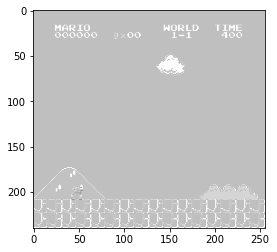

In [61]:
plt.imshow(state.squeeze())

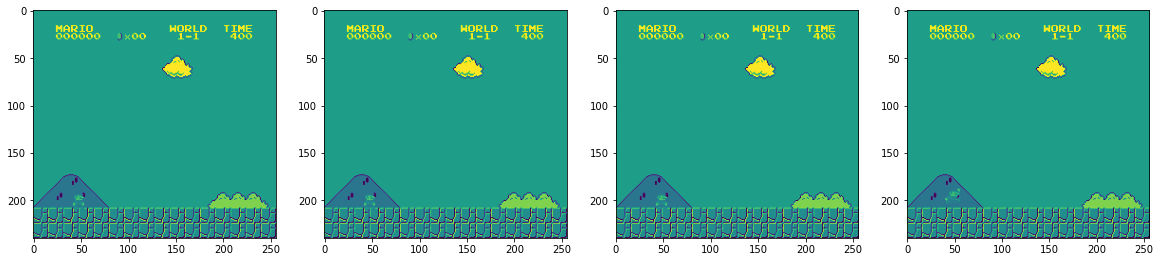

In [75]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3.Train RL model

In [9]:
#Import PPO for algorithms and Base callback for saving models
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self,check_freq,save_path,verbose = 1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path,exist_ok = True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

In [80]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [88]:
#Model saving callback function
callback = TrainAndLoggingCallback(check_freq = 10000, save_path = CHECKPOINT_DIR)

In [89]:
#AI model using PPO
model = PPO('CnnPolicy',env, verbose = 1, tensorboard_log=LOG_DIR,learning_rate = 0.000001, n_steps =512) # MlpPolicy for tabular data

Using cpu device
Wrapping the env in a VecTransposeImage.


In [90]:
#Train AI model
model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_1


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 35  |
|    iterations      | 1   |
|    time_elapsed    | 14  |
|    total_timesteps | 512 |
----------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

------------------------------------------
| time/                   |              |
|    fps                  | 16           |
|    iterations           | 2            |
|    time_elapsed         | 62           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 9.962241e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.00214     |
|    learning_rate        | 1e-06        |
|    loss                 | 251          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0001      |
|    value_loss           | 621          |
------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 3             |
|    time_elapsed         | 112           |
|    total_timesteps      | 1536          |
| train/                  |               |
|    approx_kl            | 3.3143442e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00231       |
|    learning_rate        | 1e-06         |
|    loss                 | 1.34          |
|    n_updates            | 20            |
|    policy_gradient_loss | -0.000495     |
|    value_loss           | 3.91          |
-------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 4            |
|    time_elapsed         | 161          |
|    total_timesteps      | 2048         |
| train/                  |              |
|    approx_kl            | 2.519344e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.95        |
|    explained_variance   | -0.0762      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.134        |
|    n_updates            | 30           |
|    policy_gradient_loss | 1.35e-06     |
|    value_loss           | 0.751        |
------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 5             |
|    time_elapsed         | 206           |
|    total_timesteps      | 2560          |
| train/                  |               |
|    approx_kl            | 7.1497634e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00197      |
|    learning_rate        | 1e-06         |
|    loss                 | 0.173         |
|    n_updates            | 40            |
|    policy_gradient_loss | -0.00014      |
|    value_loss           | 0.546         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 6            |
|    time_elapsed         | 249     

C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 17            |
|    time_elapsed         | 786           |
|    total_timesteps      | 8704          |
| train/                  |               |
|    approx_kl            | 1.1188909e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00248       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.142         |
|    n_updates            | 160           |
|    policy_gradient_loss | -0.000197     |
|    value_loss           | 0.313         |
-------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 18            |
|    time_elapsed         | 832           |
|    total_timesteps      | 9216          |
| train/                  |               |
|    approx_kl            | 3.7478632e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0134        |
|    learning_rate        | 1e-06         |
|    loss                 | 121           |
|    n_updates            | 170           |
|    policy_gradient_loss | 0.000119      |
|    value_loss           | 325           |
-------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 19            |
|    time_elapsed         | 878           |
|    total_timesteps      | 9728          |
| train/                  |               |
|    approx_kl            | 2.2708322e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.115         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.189         |
|    n_updates            | 180           |
|    policy_gradient_loss | -0.000241     |
|    value_loss           | 0.89          |
-------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

------------------------------------------
| time/                   |              |
|    fps                  | 11           |
|    iterations           | 20           |
|    time_elapsed         | 926          |
|    total_timesteps      | 10240        |
| train/                  |              |
|    approx_kl            | 7.949653e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | -0.0212      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.202        |
|    n_updates            | 190          |
|    policy_gradient_loss | -5.04e-05    |
|    value_loss           | 0.472        |
------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

-------------------------------------------
| time/                   |               |
|    fps                  | 11            |
|    iterations           | 21            |
|    time_elapsed         | 972           |
|    total_timesteps      | 10752         |
| train/                  |               |
|    approx_kl            | 1.6240752e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | -0.018        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.22          |
|    n_updates            | 200           |
|    policy_gradient_loss | -0.000295     |
|    value_loss           | 0.573         |
-------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encou

------------------------------------------
| time/                   |              |
|    fps                  | 11           |
|    iterations           | 22           |
|    time_elapsed         | 1018         |
|    total_timesteps      | 11264        |
| train/                  |              |
|    approx_kl            | 8.379458e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.019        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.237        |
|    n_updates            | 210          |
|    policy_gradient_loss | -0.000157    |
|    value_loss           | 0.466        |
------------------------------------------


C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [91]:
# Save model
#model.save('thisisatestmodel')

In [11]:
# Load model
model = PPO.load('./train/best_model_10000')

In [14]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state,reward,done,info = env.step(action)
    env.render()

C:\Anaconda\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] No se puede cambiar el modo de subproceso después de establecerlo
  warnings.warn(str(err))
C:\Users\ÓscarLópezMontero\AppData\Roaming\Python\Python39\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [15]:
env.close()